In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from sklearn.manifold import TSNE
from tqdm import tqdm

Read csv file 

In [2]:
data_label = pd.read_csv('label.csv')
labels = data_label.iloc[:,2:]
labels.head()

,pic,label,type
0,azurlane_0.jpg,0,0
1,azurlane_1.jpg,0,0
2,azurlane_2.jpg,0,0
3,azurlane_3.jpg,1,0
4,azurlane_4.jpg,1,0


Read images and print them randomly

In [3]:
pic_dir = './pic'
path = os.listdir(pic_dir)
path.sort()
print(f'Number of images in {pic_dir} is {len(path)}')

Number of images in ./pic is 670


(192, 144, 3)

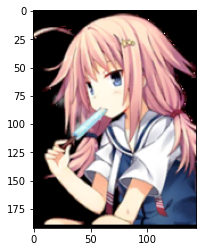

In [4]:
i = random.randrange(0,670)
imgpath = os.path.join(pic_dir, path[i])
img = cv2.imread(imgpath)
img = cv2.resize(img, (144,192))
#img = img[...,::-1]
img = np.dstack([img[:,:,2], img[:,:,1], img[:,:,0]])

plt.imshow(img)
img.shape

Print images with thier labels.

In [5]:
img_path = []
for i in range(len(path)):
    img_path.append(os.path.join(pic_dir, path[i]))

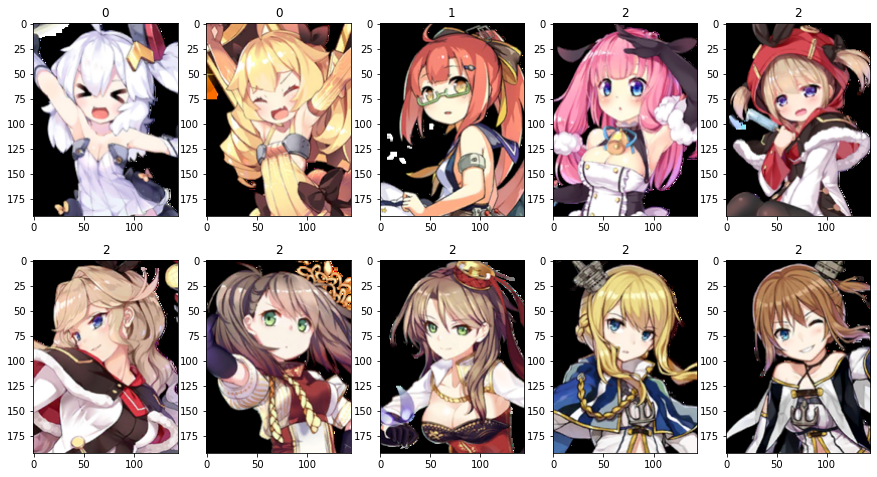

In [6]:
fig, axes = plt.subplots(2, 5, figsize = (15,8))
axes = axes.flatten()
for i in range(10):
    plt.sca(axes[i])
    plt.title(int(labels[labels['pic'] == path[i]].label))
    plt.imshow(cv2.imread(img_path[i])[...,::-1])

Adjust images and prepare for TSNE

In [7]:
data = []
for i in range(len(img_path)):
    img = cv2.imread(img_path[i])
    img = cv2.resize(img, (144,144))
    l = int(labels[labels['pic'] == path[i]].label)
    t = int(labels[labels['pic'] == path[i]].type)
    data.append([img.flatten(), l, t])

In [8]:
images, labels, types = zip(*data)

TSNE

In [9]:
features = np.array(images)
tsne = TSNE(n_components=2, learning_rate=10, perplexity=30, angle=0.2, verbose=2, random_state=42).fit_transform(features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 670 samples in 0.021s...
[t-SNE] Computed neighbors for 670 samples in 1.680s...
[t-SNE] Computed conditional probabilities for sample 670 / 670
[t-SNE] Mean sigma: 5056.501953
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 63.4112320, gradient norm = 0.0000005 (50 iterations in 3.588s)
[t-SNE] Iteration 100: error = 63.4111786, gradient norm = 0.0000000 (50 iterations in 0.223s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 63.411179
[t-SNE] Iteration 150: error = 2.7562096, gradient norm = 0.0174881 (50 iterations in 0.183s)
[t-SNE] Iteration 200: error = 1.7072377, gradient norm = 0.0021293 (50 iterations in 0.276s)
[t-SNE] Iteration 250: error = 1.6515501, gradient norm = 0.0010270 (50 iterations in 0.286s)
[t-SNE] Iteration 300: error = 1.6242309, gradient norm = 0.0006762 (50 iterations in 0.308s)
[t-SNE] Iter

In [10]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [11]:
df_tsne = pd.DataFrame(list(zip(tx, ty, labels, types)), columns=['tx','ty', 'labels', 'types'])

In [12]:
df_tsne.head()

,tx,ty,labels,types
0,0.382681,0.810444,0,0
1,0.378913,0.802602,0,0
2,0.943467,0.623688,1,0
3,0.340766,0.648229,2,2
4,0.895385,0.280631,2,2


Change labels and types to their real names

In [13]:
labels_map = {0:'Universal', 1:'Eagle Union', 2:'Royal Navy', 3:'Sakura Empire', 4:'Iron Blood', 5:'Dragon Empery', 
              6:'Northern Parliament',7:'Iris Libre', 8:'Vichya Dominion', 9:'Sardegna Empire', 10:'Tempesta',
              11:'META', 12:'The Idolmaster', 13:'SSSS', 14:'Neptunia', 15:'Utawarerumono', 
              16:'KizunaAI', 17:'Hololive', 18:'Bilibili', 19:'Venus Vacation'}

In [14]:
types_map = {0:'Destroyer', 2:'Light Cruiser', 3:'Heavy Cruiser', 4:'Battleship', 5:'Aircraft',
            6:'Repair Ship', 7:'Submarine', 8:'Munition Ship', 9:'Large Cruiser', 10:'Sailing Frigate',
            11:'DDGMunition Ship', 12:'Aviation Battleship'}

In [15]:
df_tsne['faction'] = df_tsne['labels'].map(labels_map)
df_tsne['ship_type'] = df_tsne['types'].map(types_map)

In [16]:
df_tsne.head()

,tx,ty,labels,types,faction,ship_type
0,0.382681,0.810444,0,0,Universal,Destroyer
1,0.378913,0.802602,0,0,Universal,Destroyer
2,0.943467,0.623688,1,0,Eagle Union,Destroyer
3,0.340766,0.648229,2,2,Royal Navy,Light Cruiser
4,0.895385,0.280631,2,2,Royal Navy,Light Cruiser


Only include the main characters (there are cooperate characters that came from other games)

In [17]:
df_tsne_normal = df_tsne[(df_tsne['labels'] < 12) & (df_tsne['labels'] > 0)]

TSNE visualization

Text(0.5, 1.0, 'ship type')

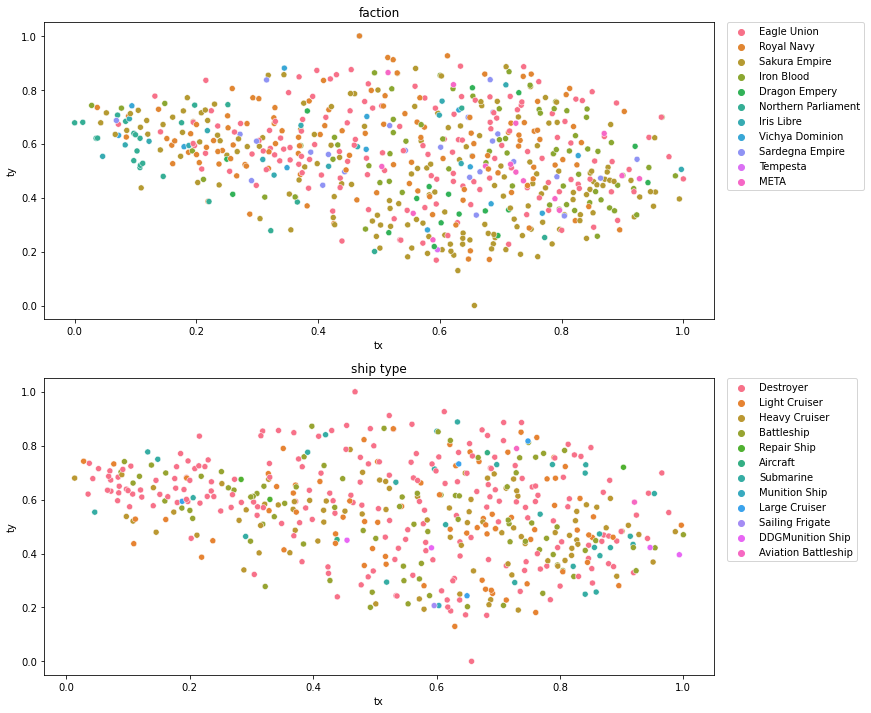

In [18]:
fig, axes = plt.subplots(2,1, figsize=(12,12))
axes = axes.flatten()
sns.scatterplot(data=df_tsne_normal, x='tx', y='ty', hue='faction', ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[0].set_title('faction')
sns.scatterplot(data=df_tsne_normal, x='tx', y='ty', hue='ship_type', ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[1].set_title('ship type')

Conclusion:

No difference between each faction or ship type.